In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
from scipy import stats
import seaborn as sns
from functools import reduce
pd.options.mode.chained_assignment = None 
from statistics import mean
from Profile_Generation import *
from plotting import *
import warnings
warnings.simplefilter('ignore', np.RankWarning)
from scipy.optimize import curve_fit
import matplotlib.patches as patches
from scipy.optimize import curve_fit
from openpyxl import load_workbook
import math
from scipy.optimize import OptimizeWarning
warnings.simplefilter("ignore", OptimizeWarning)
import timeit

In [ ]:
%%time
# ~18mins

# Execute CURATE without pop tau
execute_CURATE()

# Perform CV and LOOCV
five_fold_cross_val_results, five_fold_cross_val_results_summary = find_pop_tau_with_CV()
execute_CURATE_and_update_pop_tau_results('CV', five_fold_cross_val_results_summary, five_fold_cross_val_results)

# Perform LOOCV
five_fold_cross_val_results, five_fold_cross_val_results_summary = find_pop_tau_with_LOOCV()
execute_CURATE_and_update_pop_tau_results('LOOCV', five_fold_cross_val_results_summary, five_fold_cross_val_results)

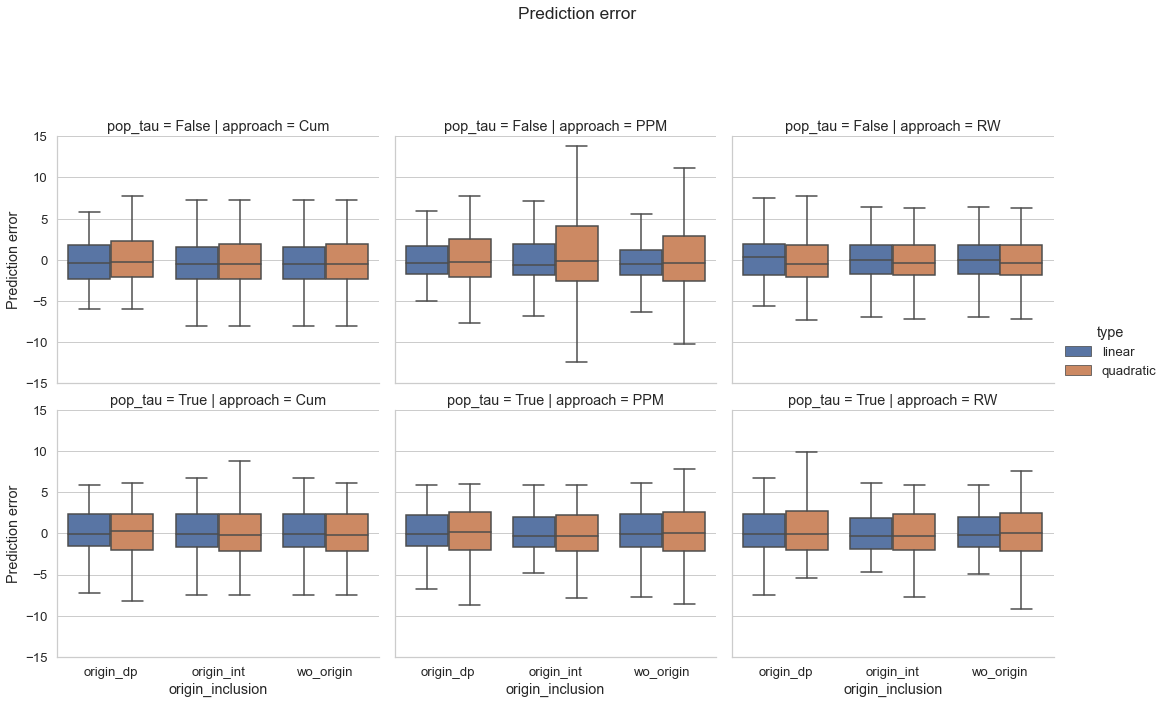

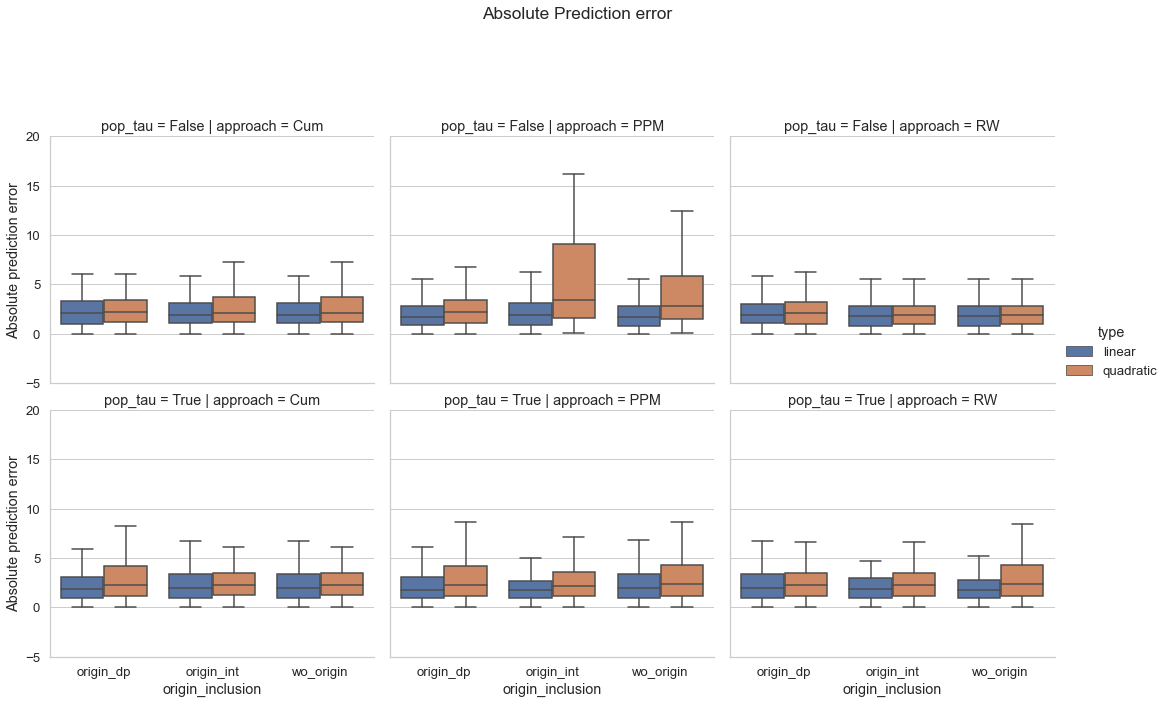

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
from scipy import stats
import seaborn as sns
from functools import reduce
pd.options.mode.chained_assignment = None 
from statistics import mean
from Profile_Generation import *
from plotting import *
import warnings
warnings.simplefilter('ignore', np.RankWarning)
from scipy.optimize import curve_fit
import matplotlib.patches as patches
from scipy.optimize import curve_fit
from openpyxl import load_workbook
import math
from scipy.optimize import OptimizeWarning
warnings.simplefilter("ignore", OptimizeWarning)
import timeit

prediction_error()

In [2]:
# RMSE
import pandas as pd

df = pd.read_excel('GOOD OUTPUT DATA\output (with pop tau by LOOCV).xlsx', sheet_name='result')

In [90]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

dat = df.copy()

# Keep all methods in dataframe except strictly tau methods (contains 'tau' but does not contain 'pop')
method_list = dat.method.unique().tolist()
exclude_method_list = [x for x in method_list if (('tau' in x) and ('pop' not in x))]
method_list = [x for x in method_list if x not in exclude_method_list]
dat = dat[dat.method.isin(method_list)]
dat = dat.reset_index(drop=True)

# Find RMSE by method
def rmse(dat):
    rmse = mean_squared_error(dat.response, dat.prediction, squared=False)
    return pd.Series(dict(rmse=rmse))
    
dat = dat.groupby('method').apply(rmse).reset_index()

# Create pop tau column and remove 'pop_tau' from method name
dat['pop_tau'] = ""
dat['OG_method'] = ""
for i in range(len(dat)):
    if 'pop_tau' in dat.method[i]:
        dat.loc[i, 'pop_tau'] = 'pop tau'
        dat.loc[i, 'OG_method'] = dat.loc[i, 'method'][:-8]
    else: 
        dat.loc[i, 'pop_tau'] = 'no pop tau'
        dat.loc[i, 'OG_method'] = dat.loc[i, 'method']

# Line plot of RMSE for pop tau and non pop tau
plt.figure(figsize=(15,10))
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

sns.lineplot(data=dat, x='OG_method', y='rmse', hue='pop_tau', marker='o', ax=ax)
sns.lineplot(data=dat, x='OG_method', y='rmse', hue='pop_tau', marker='o', ax=ax2)

ax2.set_ylim([min(dat.rmse), 12])
ax.set_ylim([np.exp(12), max(dat.rmse)+np.exp(12)])

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
# ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax.set_ylabel(None)
ax2.set_ylabel('RMSE', loc='top')
ax2.set_xlabel(None)
ax2.get_legend().remove()
plt.xticks(rotation=90)

# Save
plt.savefig('RMSE.png', bbox_inches='tight', dpi=300, facecolor='w')

count    1.800000e+01
mean     3.213823e+11
std      9.894634e+11
min      3.260473e+00
25%      3.628439e+00
50%      4.213380e+00
75%      5.007403e+00
max      3.833285e+12
Name: rmse, dtype: float64

In [ ]:
five_fold_cross_val_results_summary.loc[five_fold_cross_val_results_summary.index\
                [five_fold_cross_val_results_summary.method == 'Q_Cum_origin_int_tau'], 'pop_half_life']

In [ ]:
new_df = five_fold_cross_val_results_summary.copy()
a = float(new_df.loc[new_df.index[new_df.method == 'L_Cum_origin_dp_tau'], 'pop_half_life'])
a

In [ ]:
pd.set_option('display.max_rows', None)
dat.index[dat.abs_deviation == dat[dat.method == 'L_PPM_origin_int_tau'].abs_deviation.min()]

In [ ]:
import pandas as pd
dat = pd.read_excel('output.xlsx', sheet_name='clean')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("viridis")
dat.dose = dat.dose.astype(float)
g = sns.FacetGrid(dat, col='patient', col_wrap=5, hue='dose', palette=sns.color_palette("rocket", dat.dose.nunique()), sharex=None)
g.map_dataframe(sns.scatterplot, x='day', y='response')
# g.map_dataframe(sns.lineplot, col='black', x='day', y='response')
g.refline(y=8, color='black', lw=1, ls='--')
g.refline(y=10, color='black', lw=1, ls='--')
g.add_legend()

In [ ]:
dat.head()

In [ ]:
dat.dose.dtype

In [ ]:
dat = result_df.copy()
dat.head()

In [ ]:
# How are the predictions different, between different half-lives, for each method compared to without tau?
# Plot prediction vs prediction day, for each patient, colored by tau with different half-lives vs non-tau

dat = result_df.copy()
dat = dat[['prediction', 'pred_day', 'half_life', 'method', 'patient', 'deviation']]
patient_list = dat.patient.unique()
method_list = dat.method.unique()
dat = dat[dat.patient == patient_list[6]]
dat.half_life = dat.half_life.fillna(0)
# L_Cum_origin_dp_tau
palette = sns.color_palette("rocket_r", n_colors=len(dat.half_life.unique()))
# a = np.arange(3.5, 41.5, 1)
# dat.half_life.unique()
sns.lineplot(data=dat[dat.method.str.contains("L_RW_origin_dp")], 
             x="pred_day", y="deviation", hue="half_life", 
             palette=palette, ci=None)
plt.legend(bbox_to_anchor=(1.25,1), loc='upper right')
# plt.plot(data=dat[dat.method == "L_Cum_origin_dp_tau"], 
#          x="pred_day", y="prediction", color="half_life".map())

In [ ]:
dat = result_df.copy()
dat = dat[['deviation', 'method', 'patient', 'pred_day', 'response', 'prediction', 'half_life']]
dat['half_life'] = dat['half_life'].fillna('')
dat = dat.loc[(dat.method == 'Q_Cum_origin_dp_tau') | (dat.method == 'Q_Cum_origin_dp')]
dat['new_method'] = ""
for i in range(len(dat)):
    dat['new_method'].iloc[i] = dat['method'].iloc[i] + '_' + str(dat['half_life'].iloc[i])
    # print(dat['method'].iloc[i])
plot = sns.lineplot(data=dat, x="patient", y="deviation", hue="new_method", ci=None, legend=False)
plot = sns.lineplot(data=dat.loc[dat.method=='Q_Cum_origin_dp_ '], x="patient", y="deviation", color='b', ci=None, legend=False)
# dat.head()

# sns.lineplot(data=dat.loc[dat.patient==84], x="pred_day", y="deviation", hue="method")

# dat

In [ ]:
# Plotting
# perc_days_within_target_tac(result_df)
# perc_days_outside_target_tac(result_df)
# median_perc_within_acc_dev(result_df)
# can_benefit(result_df)
# modified_TTR(result_df)
# wrong_range(result_df)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import math

d = {'dose': [0.5, 1, 1.5, 1.5, 3, 3], 'response': [2.4, 2.8, 3.2, 3.1, 7.9, 10]}
df = pd.DataFrame(data=d)

# Calculate weight
j = 0
decay_weight = []
for i in range(len(df)):
    decay_weight.append(math.exp(-(24*(i))/(12/np.log(2))))

# Fit model
poly_reg = PolynomialFeatures(degree=2)
X = np.array(df.dose).reshape(-1, 1)
y = np.array(df.response)
X = poly_reg.fit_transform(X)
result = LinearRegression(fit_intercept=False).fit(X, y, decay_weight)
result.coef_
# new = 3
# prediction = result.predict(poly_reg.fit_transform([[new]]))[0]
# prediction

In [ ]:
np.array(3).reshape(-1, 1)

In [ ]:
a = pd.DataFrame(columns=['col1','col2'])
a = a[0:0]
a.loc[2, :] = [1, 2]

b = pd.DataFrame(columns=['col1','col2'])
b = b[0:0]
b.loc[0, :] = [1, 2]
b.loc[1, :] = [1, 2]

pd.concat([a, b])

In [ ]:
hello = ""
if hello:
    print('not empty')
else: print('empty')

In [ ]:
cols = ['a','b']
list_of_series = [pd.Series([1,2],index=cols), pd.Series([3,4],index=cols)]
df = pd.DataFrame(list_of_series, columns=cols)
df = pd.DataFrame(columns=cols)
df